In [72]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt, dates
import datetime
from sklearn import linear_model

sb.set_context("poster")
plt.style.use('ggplot')

In [9]:
def get_stock(period, stock_ticker):
    stock = yf.Ticker(stock_ticker)
    #periods = “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
    if period == '1d':
        interval = '1m'
    else:
        interval = '1d'
    return stock.history(period=period, interval=interval, actions=False)

In [74]:
amzn_df = get_stock(period='1mo', stock_ticker='amzn')

In [93]:
amzn_df.tail(10)

,Open,High,Low,Close,Volume,days_from_start,linear_fit
Date,,,,,,,
2021-10-18,3388.360107,3449.169922,3385.100098,3446.739990,3174100,18,3350.672975
2021-10-19,3434.290039,3454.689941,3422.000000,3444.149902,2386100,19,3357.002742
2021-10-20,3452.659912,3462.860107,3400.370117,3415.060059,2139800,20,3363.332508
2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,1881400,21,3369.662275
2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3133800,22,3375.992042
2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,2226000,25,3394.981343
2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,2698300,26,3401.311109
2021-10-27,3388.000000,3437.000000,3371.449951,3392.489990,2702200,27,3407.640876
2021-10-28,3402.100098,3479.000000,3386.000000,3446.570068,5708700,28,3413.970643


In [115]:
amzn_df.index[-1]

Timestamp('2021-10-29 00:00:00')

In [107]:
amzn_df.loc[:, 'Close'].iloc[-1]

3372.429931640625

In [98]:
amzn_df.loc[:, 'Close'].mean()

3331.9713911576705

In [92]:
amzn_df['days_from_start'] = (amzn_df.index - amzn_df.index[0]).days

In [94]:
x = amzn_df.loc[:, 'days_from_start'].T
y = amzn_df.loc[:, 'Close']

In [90]:
polyfit_close = np.polyfit(x, y, 1)
function = np.poly1d(polyfit_close) 
amzn_df['linear_fit'] = function(amzn_df.loc[:, 'days_from_start'])

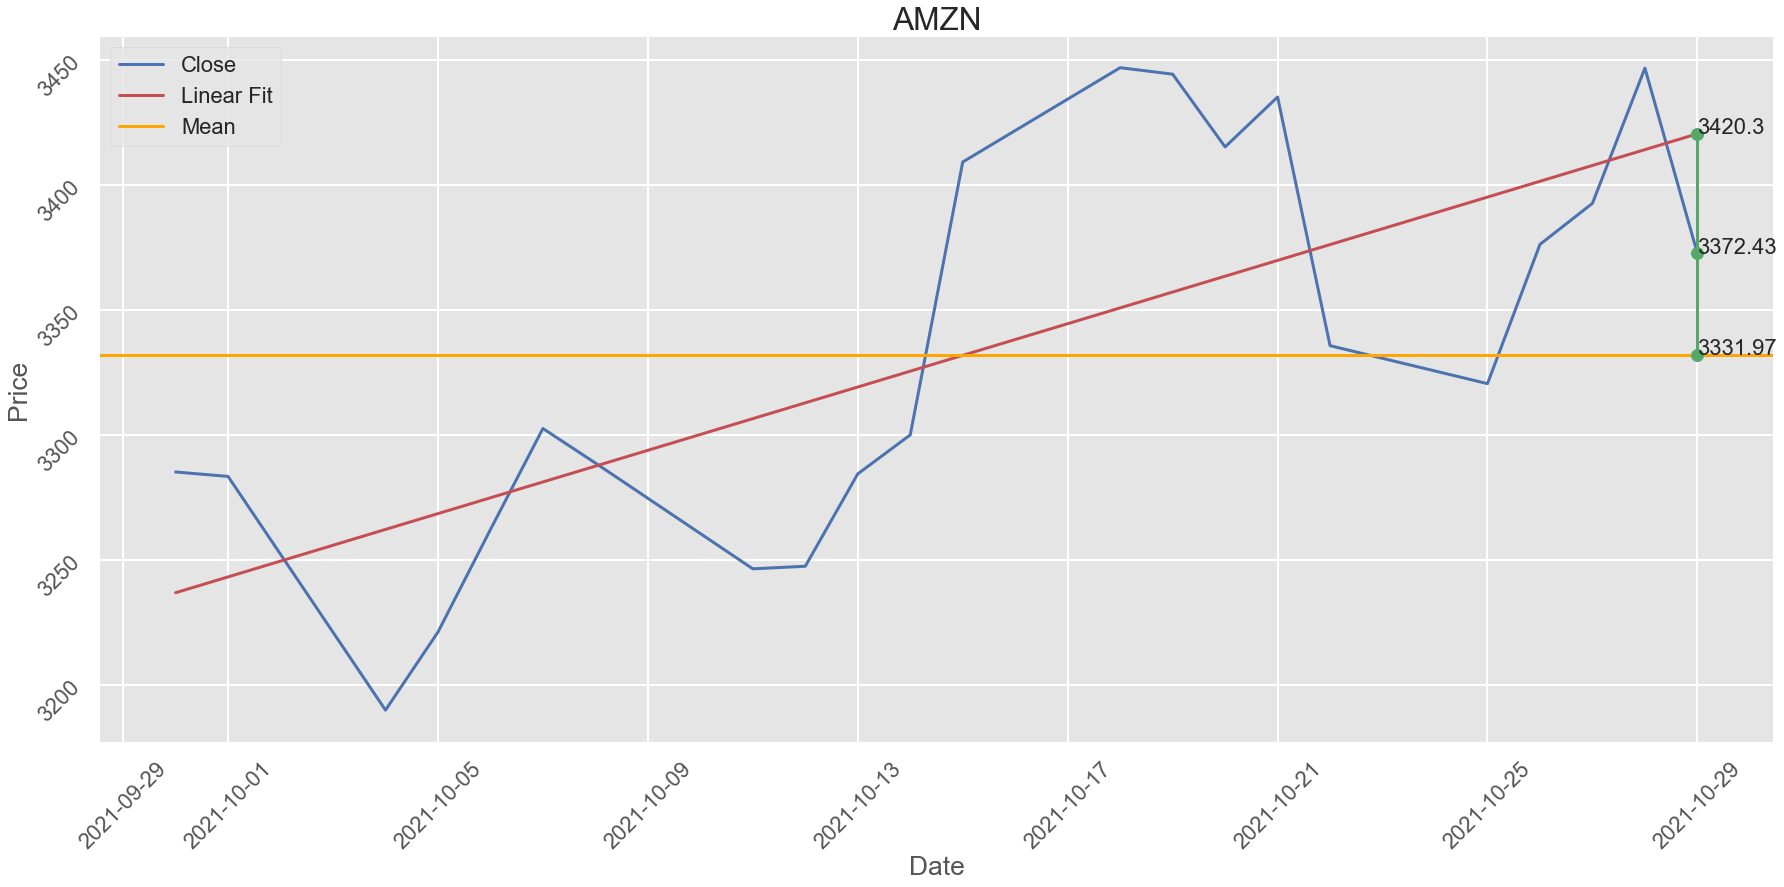

In [131]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30, 13))
ax.set_title("AMZN")
ax.plot(amzn_df.loc[:, 'Close'], color='b', label='Close')
ax.plot(amzn_df.loc[:, 'linear_fit'], color='r', label='Linear Fit')
ax.axhline(amzn_df.loc[:, 'Close'].mean(), color='orange', label='Mean')

ax.plot([amzn_df.index[-1], amzn_df.index[-1], amzn_df.index[-1]], [amzn_df.loc[:, 'Close'].iloc[-1], amzn_df.loc[:, 'linear_fit'].iloc[-1], amzn_df.loc[:, 'Close'].mean()], color='g', marker='o', linestyle='-')

ax.annotate(round(amzn_df.loc[:, 'Close'].iloc[-1], 2), (amzn_df.index[-1], amzn_df.loc[:, 'Close'].iloc[-1]))
ax.annotate(round(amzn_df.loc[:, 'linear_fit'].iloc[-1], 2), (amzn_df.index[-1], amzn_df.loc[:, 'linear_fit'].iloc[-1]))
ax.annotate(round(amzn_df.loc[:, 'Close'].mean(), 2), (amzn_df.index[-1], amzn_df.loc[:, 'Close'].mean()))

ax.legend()

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.tick_params(labelrotation=45)

plt.show()

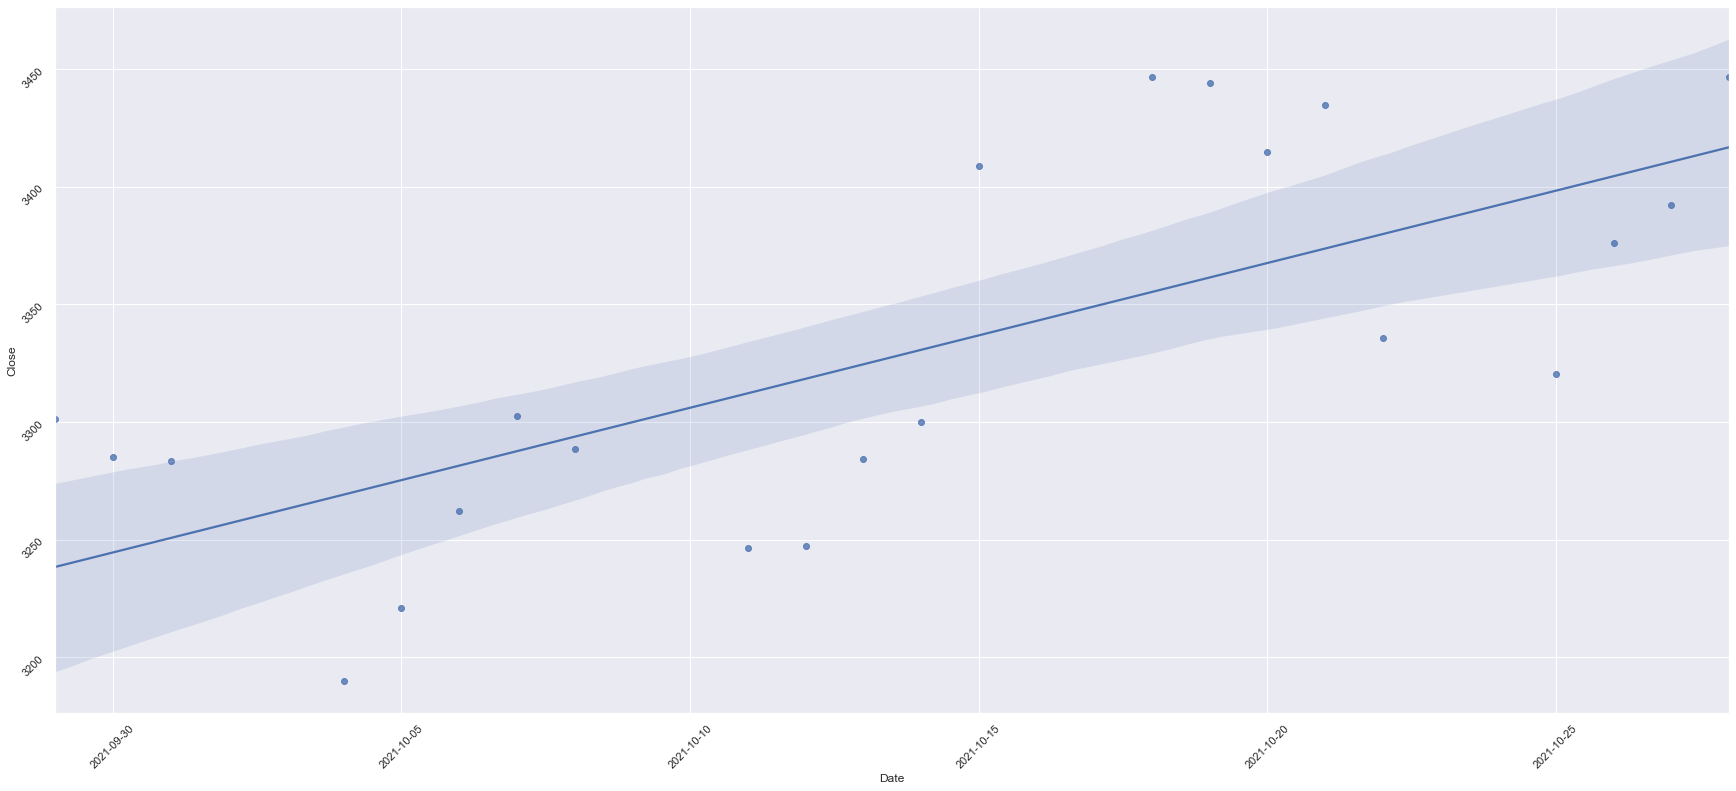

In [68]:
sb.set_theme()
amzn_df.loc[:, 'Date'] = dates.date2num(amzn_df.index)
@plt.FuncFormatter
def fake_dates(x, pos):
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(30, 13))
sb.regplot(x='Date', y='Close', data=amzn_df, fit_reg=True, ax=ax)
ax.xaxis.set_major_formatter(fake_dates)
ax.tick_params(labelrotation=45)